In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trim prediction

In [3]:
temp = pd.read_csv('data/final/test_final_clean.csv')
temp.loc[231]

VehListdays                             48.50059
VehMileage                                  64.0
Dealer_Listing_Price                     38900.0
VehYear                                     2019
ListingID                                 311804
VehEngine                  3.6L V6 24V MPFI DOHC
SellerListSrc           Digital Motorworks (DMi)
SellerState                                   PA
VehFuel                                 Gasoline
VehColorExt                                White
VehColorInt                                black
VehTransmission                8-Speed Automatic
VehPriceLabel                          Good Deal
VehDriveTrain                                4WD
Vehicle_Trim                             Limited
VehMake                                     Jeep
VehModel                          Grand Cherokee
RatingCategory                  Excellent Rating
SellerCategory                      Rare Sellers
SellerIsPriv                               False
SourceCategory      

In [5]:
df_trim_t = pd.read_csv('data/final/test_final_clean.csv')

In [6]:
df_trim_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VehListdays           6298 non-null   float64
 1   VehMileage            6298 non-null   float64
 2   Dealer_Listing_Price  6298 non-null   float64
 3   VehYear               6298 non-null   int64  
 4   ListingID             6298 non-null   int64  
 5   VehEngine             6298 non-null   object 
 6   SellerListSrc         6298 non-null   object 
 7   SellerState           6298 non-null   object 
 8   VehFuel               6298 non-null   object 
 9   VehColorExt           6298 non-null   object 
 10  VehColorInt           6298 non-null   object 
 11  VehTransmission       6298 non-null   object 
 12  VehPriceLabel         6298 non-null   object 
 13  VehDriveTrain         6298 non-null   object 
 14  Vehicle_Trim          6298 non-null   object 
 15  VehMake              

In [7]:
df_trim_t.drop(columns=['ListingID'], inplace=True)

In [8]:
X = df_trim_t.drop('Vehicle_Trim',axis=1)

In [9]:
y = df_trim_t['Vehicle_Trim']

In [10]:
X = pd.get_dummies(X,drop_first=True)

In [11]:
X.head()

,VehListdays,VehMileage,Dealer_Listing_Price,VehYear,SellerIsPriv,VehCertified,VehEngine_3.6L,VehEngine_3.6L V6,VehEngine_3.6L V6 24V GDI DOHC,VehEngine_3.6L V6 24V MPFI DOHC,...,VehMake_Jeep,VehModel_XT5,RatingCategory_Excellent Rating,RatingCategory_Good Rating,RatingCategory_Low Rating,SellerCategory_Low Volume Sellers,SellerCategory_Medium Volume Sellers,SellerCategory_Rare Sellers,SourceCategory_Medium-Frequency Sources,SourceCategory_Other Sources
0,8.600069,39319.0,30990.0,2015,False,False,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,2.920127,30352.0,34860.0,2017,False,True,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,28.107014,38957.0,23249.0,2015,False,True,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,59.816875,20404.0,31977.0,2018,False,False,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
4,98.665301,19788.0,33495.0,2018,False,False,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [12]:
y.head()

0    Limited
1    unknown
2    Limited
3    Limited
4     Luxury
Name: Vehicle_Trim, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [18]:
gb_model = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(gb_model,param_grid)

In [20]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [21]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [22]:
from sklearn.metrics import classification_report,accuracy_score

In [23]:
predictions = grid.predict(X_test)

In [24]:
predictions[230:231]

array(['Limited'], dtype=object)

In [25]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

          Base       0.75      0.68      0.71        22
           FWD       0.86      1.00      0.92         6
       Limited       0.96      0.96      0.96       500
        Luxury       0.82      0.73      0.77       107
      Platinum       0.80      0.84      0.82        19
Premium Luxury       0.79      0.85      0.82       203
     Trailhawk       0.67      0.56      0.61        25
       unknown       1.00      0.98      0.99        63

      accuracy                           0.89       945
     macro avg       0.83      0.83      0.83       945
  weighted avg       0.89      0.89      0.89       945



In [26]:
grid.best_estimator_.feature_importances_

array([2.89983820e-02, 9.65654854e-02, 2.26057160e-01, 5.83445714e-02,
       1.36696237e-04, 1.43774284e-02, 2.87529981e-04, 2.07088817e-03,
       1.66281485e-03, 2.09831090e-03, 2.22744392e-03, 1.02780699e-06,
       1.11940535e-02, 4.04119630e-04, 1.08589251e-03, 1.07842723e-01,
       1.13899124e-03, 9.26722338e-04, 4.15001197e-03, 1.19652762e-03,
       6.93443829e-03, 2.77766992e-05, 2.36443258e-05, 4.76874316e-05,
       3.37829726e-04, 1.72591218e-04, 4.29777674e-04, 1.14688193e-03,
       1.40707610e-03, 2.23149746e-04, 3.43637121e-06, 8.17894680e-04,
       4.14915552e-04, 1.43253512e-06, 8.05098965e-04, 6.16018975e-04,
       2.31002985e-03, 1.36648976e-03, 2.50335276e-05, 8.64263482e-04,
       5.28975394e-04, 2.80020267e-04, 6.53375125e-04, 1.77097253e-08,
       1.81209237e-03, 6.02385276e-04, 5.23153154e-04, 4.40166458e-05,
       1.00691621e-04, 7.96731901e-04, 0.00000000e+00, 1.66203956e-04,
       6.51134604e-05, 6.93629881e-04, 1.22227629e-04, 3.43158245e-04,
      

In [27]:
feat_import = grid.best_estimator_.feature_importances_

In [28]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [29]:
imp_feats

,Importance
VehListdays,0.028998
VehMileage,0.096565
Dealer_Listing_Price,0.226057
VehYear,0.058345
SellerIsPriv,0.000137
...,...
SellerCategory_Low Volume Sellers,0.001050
SellerCategory_Medium Volume Sellers,0.001507
SellerCategory_Rare Sellers,0.001749
SourceCategory_Medium-Frequency Sources,0.014519


In [30]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
Dealer_Listing_Price,2.260572e-01
VehMake_Jeep,1.841155e-01
VehModel_XT5,1.201185e-01
VehEngine_unknown,1.078427e-01
VehMileage,9.656549e-02
...,...
VehTransmission_Other,5.586101e-07
SellerState_ME,1.770973e-08
SellerState_ND,0.000000e+00
VehColorInt_red,0.000000e+00


In [31]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,115.0,0.008696,0.032059,0.0,0.000169,0.000818,0.001718,0.226057


In [32]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [33]:
imp_feats.sort_values('Importance')

,Importance
SellerState_LA,0.000529
SellerState_MN,0.000602
SellerState_ID,0.000616
SellerState_VA,0.000641
SellerState_MD,0.000653
...,...
VehMileage,0.096565
VehEngine_unknown,0.107843
VehModel_XT5,0.120118
VehMake_Jeep,0.184115


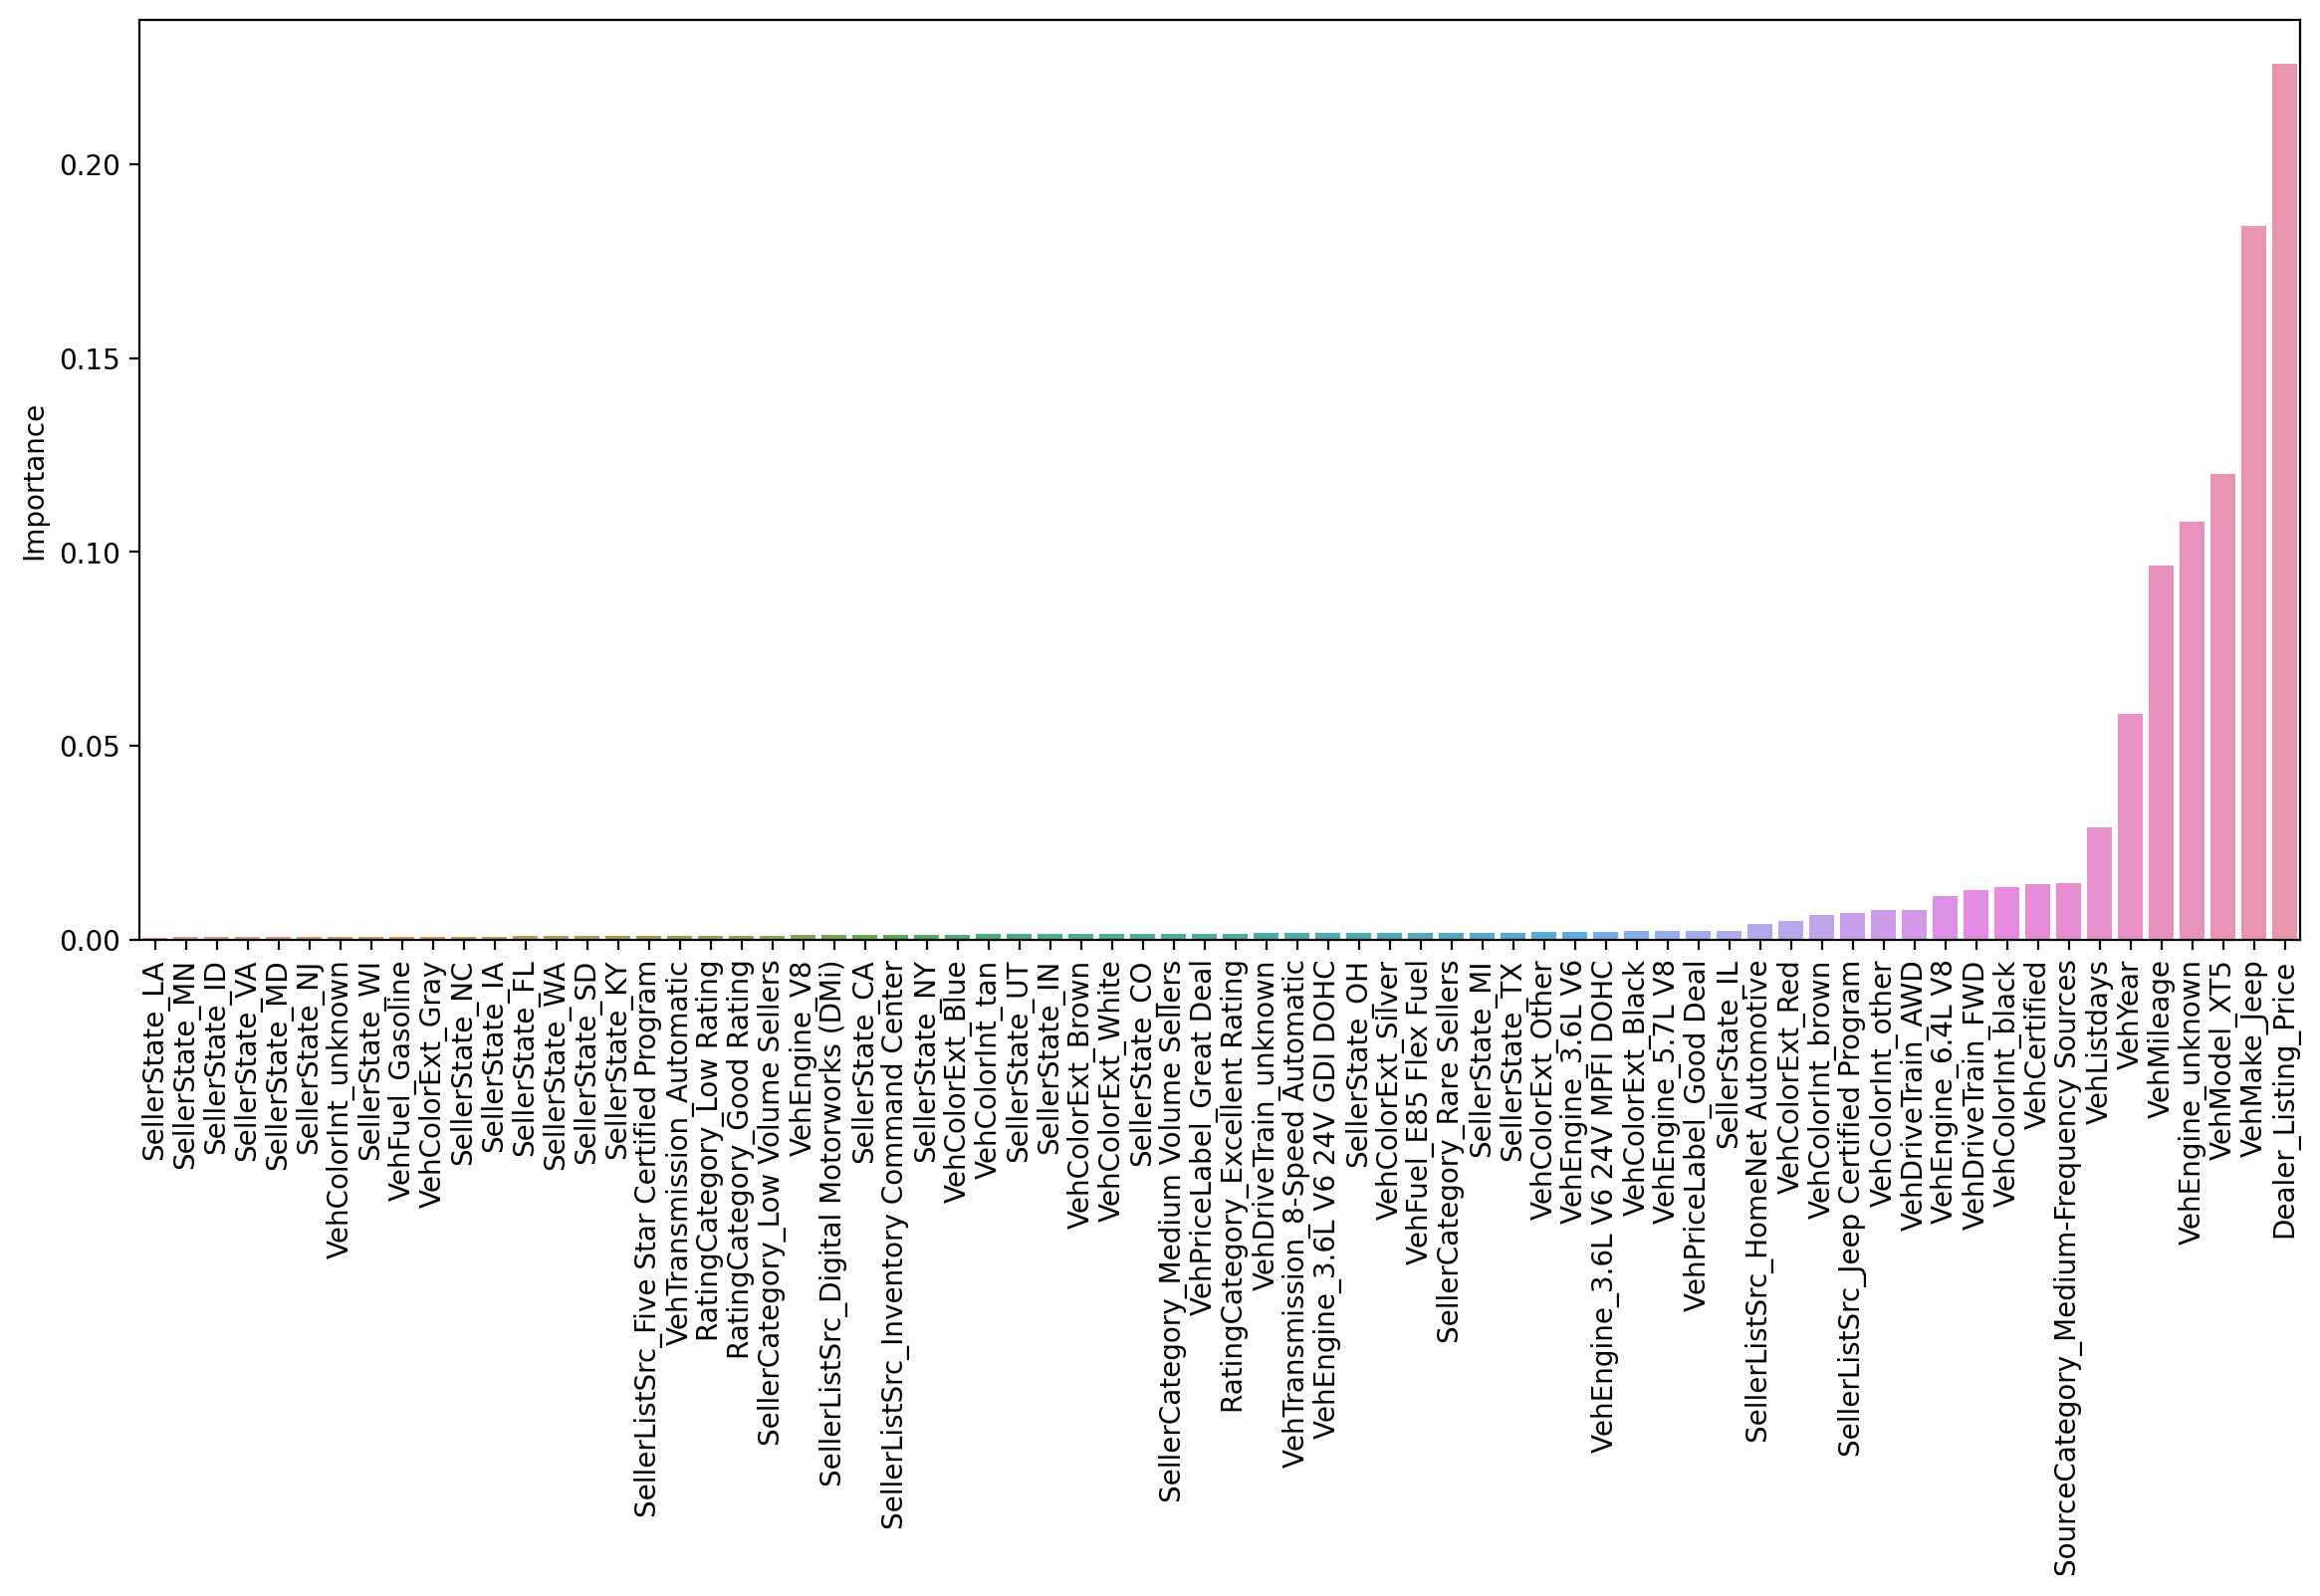

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);